<a href="https://colab.research.google.com/github/Raorakshith/scontidemo/blob/master/PytesseractOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tesseract
!pip install pytesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=6ac31715b701439de467ae16c69e41ebb74db6ce70aaaf6ab96d95955ba09398
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [ ]:
!apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,043 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121747 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!apt install tesseract-ocr-hin


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-hin
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 913 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-hin all 1:4.00~git30-7274cfa-1.1 [913 kB]
Fetched 913 kB in 1s (1,649 kB/s)
Selecting previously unselected package tesseract-ocr-hin.
(Reading database ... 121794 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-hin_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-hin (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-hin (1:4.00~git30-7274cfa-1.1) ...


In [ ]:
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (350 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121798 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
from pdf2image import convert_from_path

# Replace 'input_file.pdf' with the path to your PDF file
pdf_file = 'gs2022.pdf'
pages = convert_from_path(pdf_file)

In [ ]:
import cv2
import numpy as np

def deskew1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    coords = np.column_stack(np.where(gray > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    cv2_imshow(rotated)
    return rotated

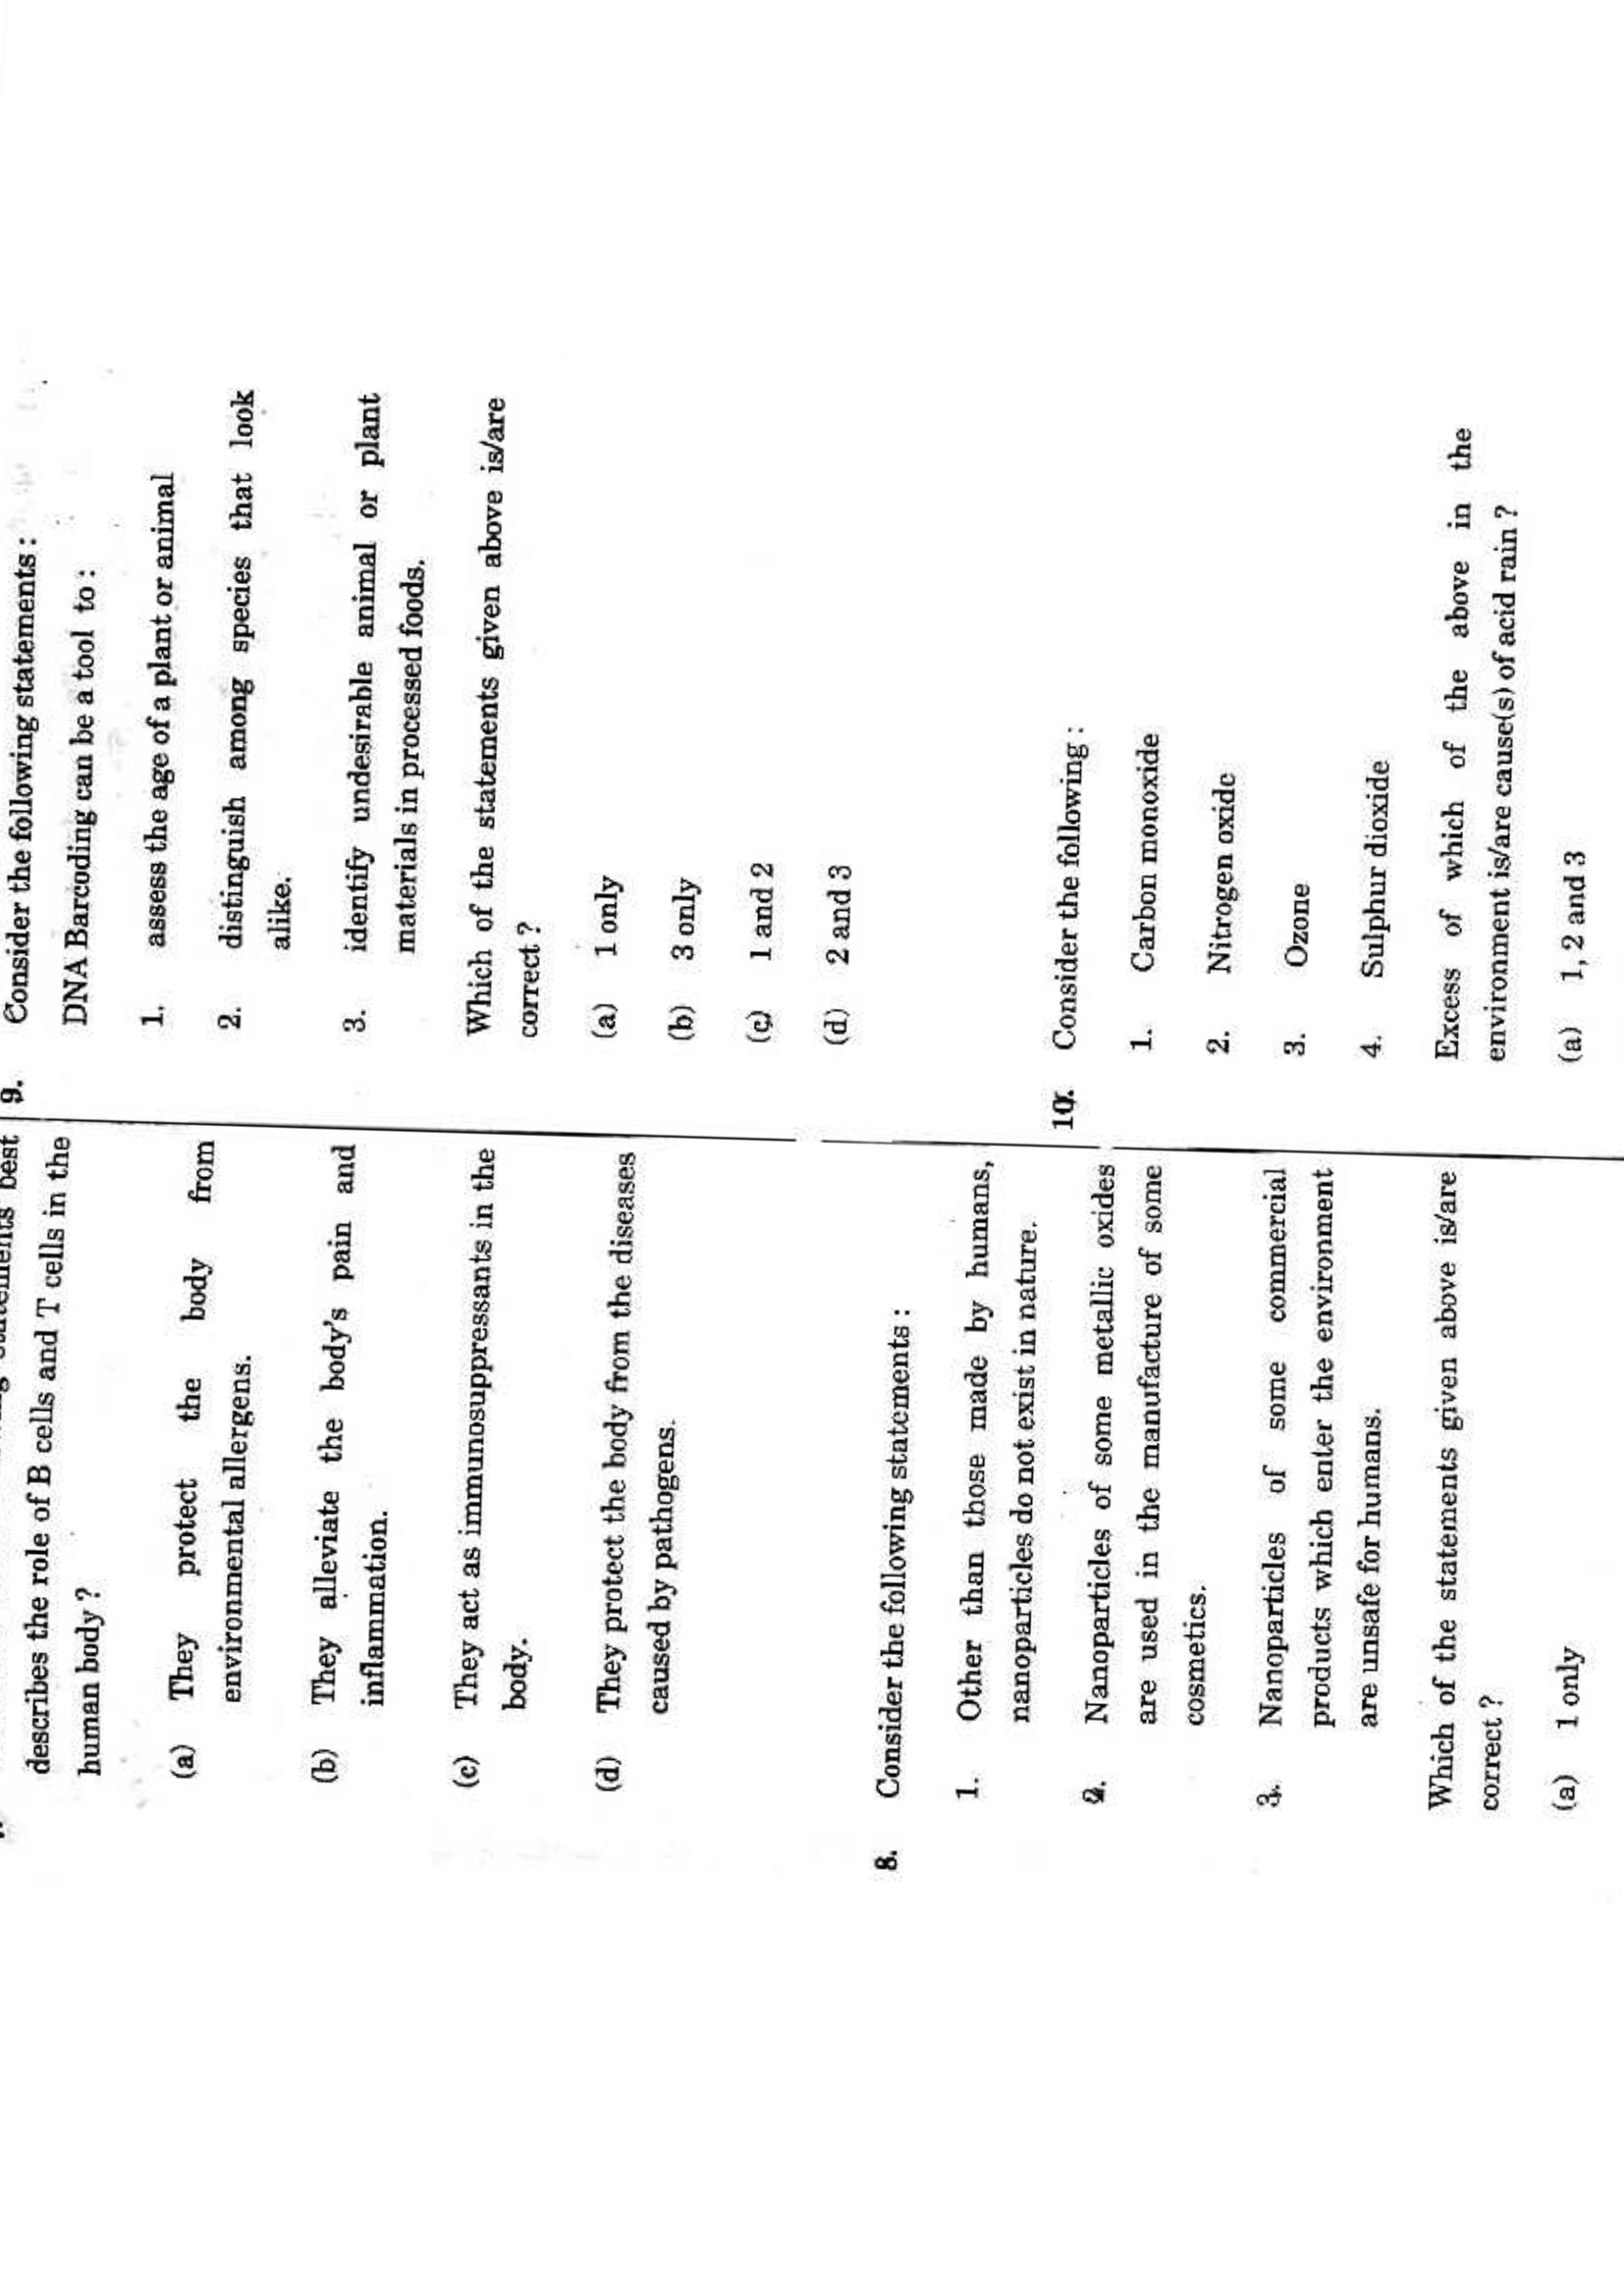

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def deskew(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    coords = np.column_stack(np.where(gray > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # if angle < -45:
    #     angle = -(90 + angle)
    # else:
    #     angle = -angle

    # # Ensure that the angle is such that vertical lines become perfectly vertical
    # if angle > 0:
    #     angle -= 90

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    cv2_imshow(rotated)

    return rotated

# Example usage:
deskewed_image = deskew(np.array(pages[2]))

In [ ]:
from google.colab.patches import cv2_imshow
def splitImage(image):

# Load the image

  # Get the height and width of the image
  height, width, _ = image.shape
  print(height, width)

  # Calculate the center of the image
  center_x, center_y = width // 2, height // 2

  # Divide the image into two parts at the center
  left_half = image[:, :center_x, :]
  right_half = image[:, center_x:, :]
  cv2_imshow(image)
  cv2_imshow(left_half)
  cv2_imshow(right_half)


2339 1654


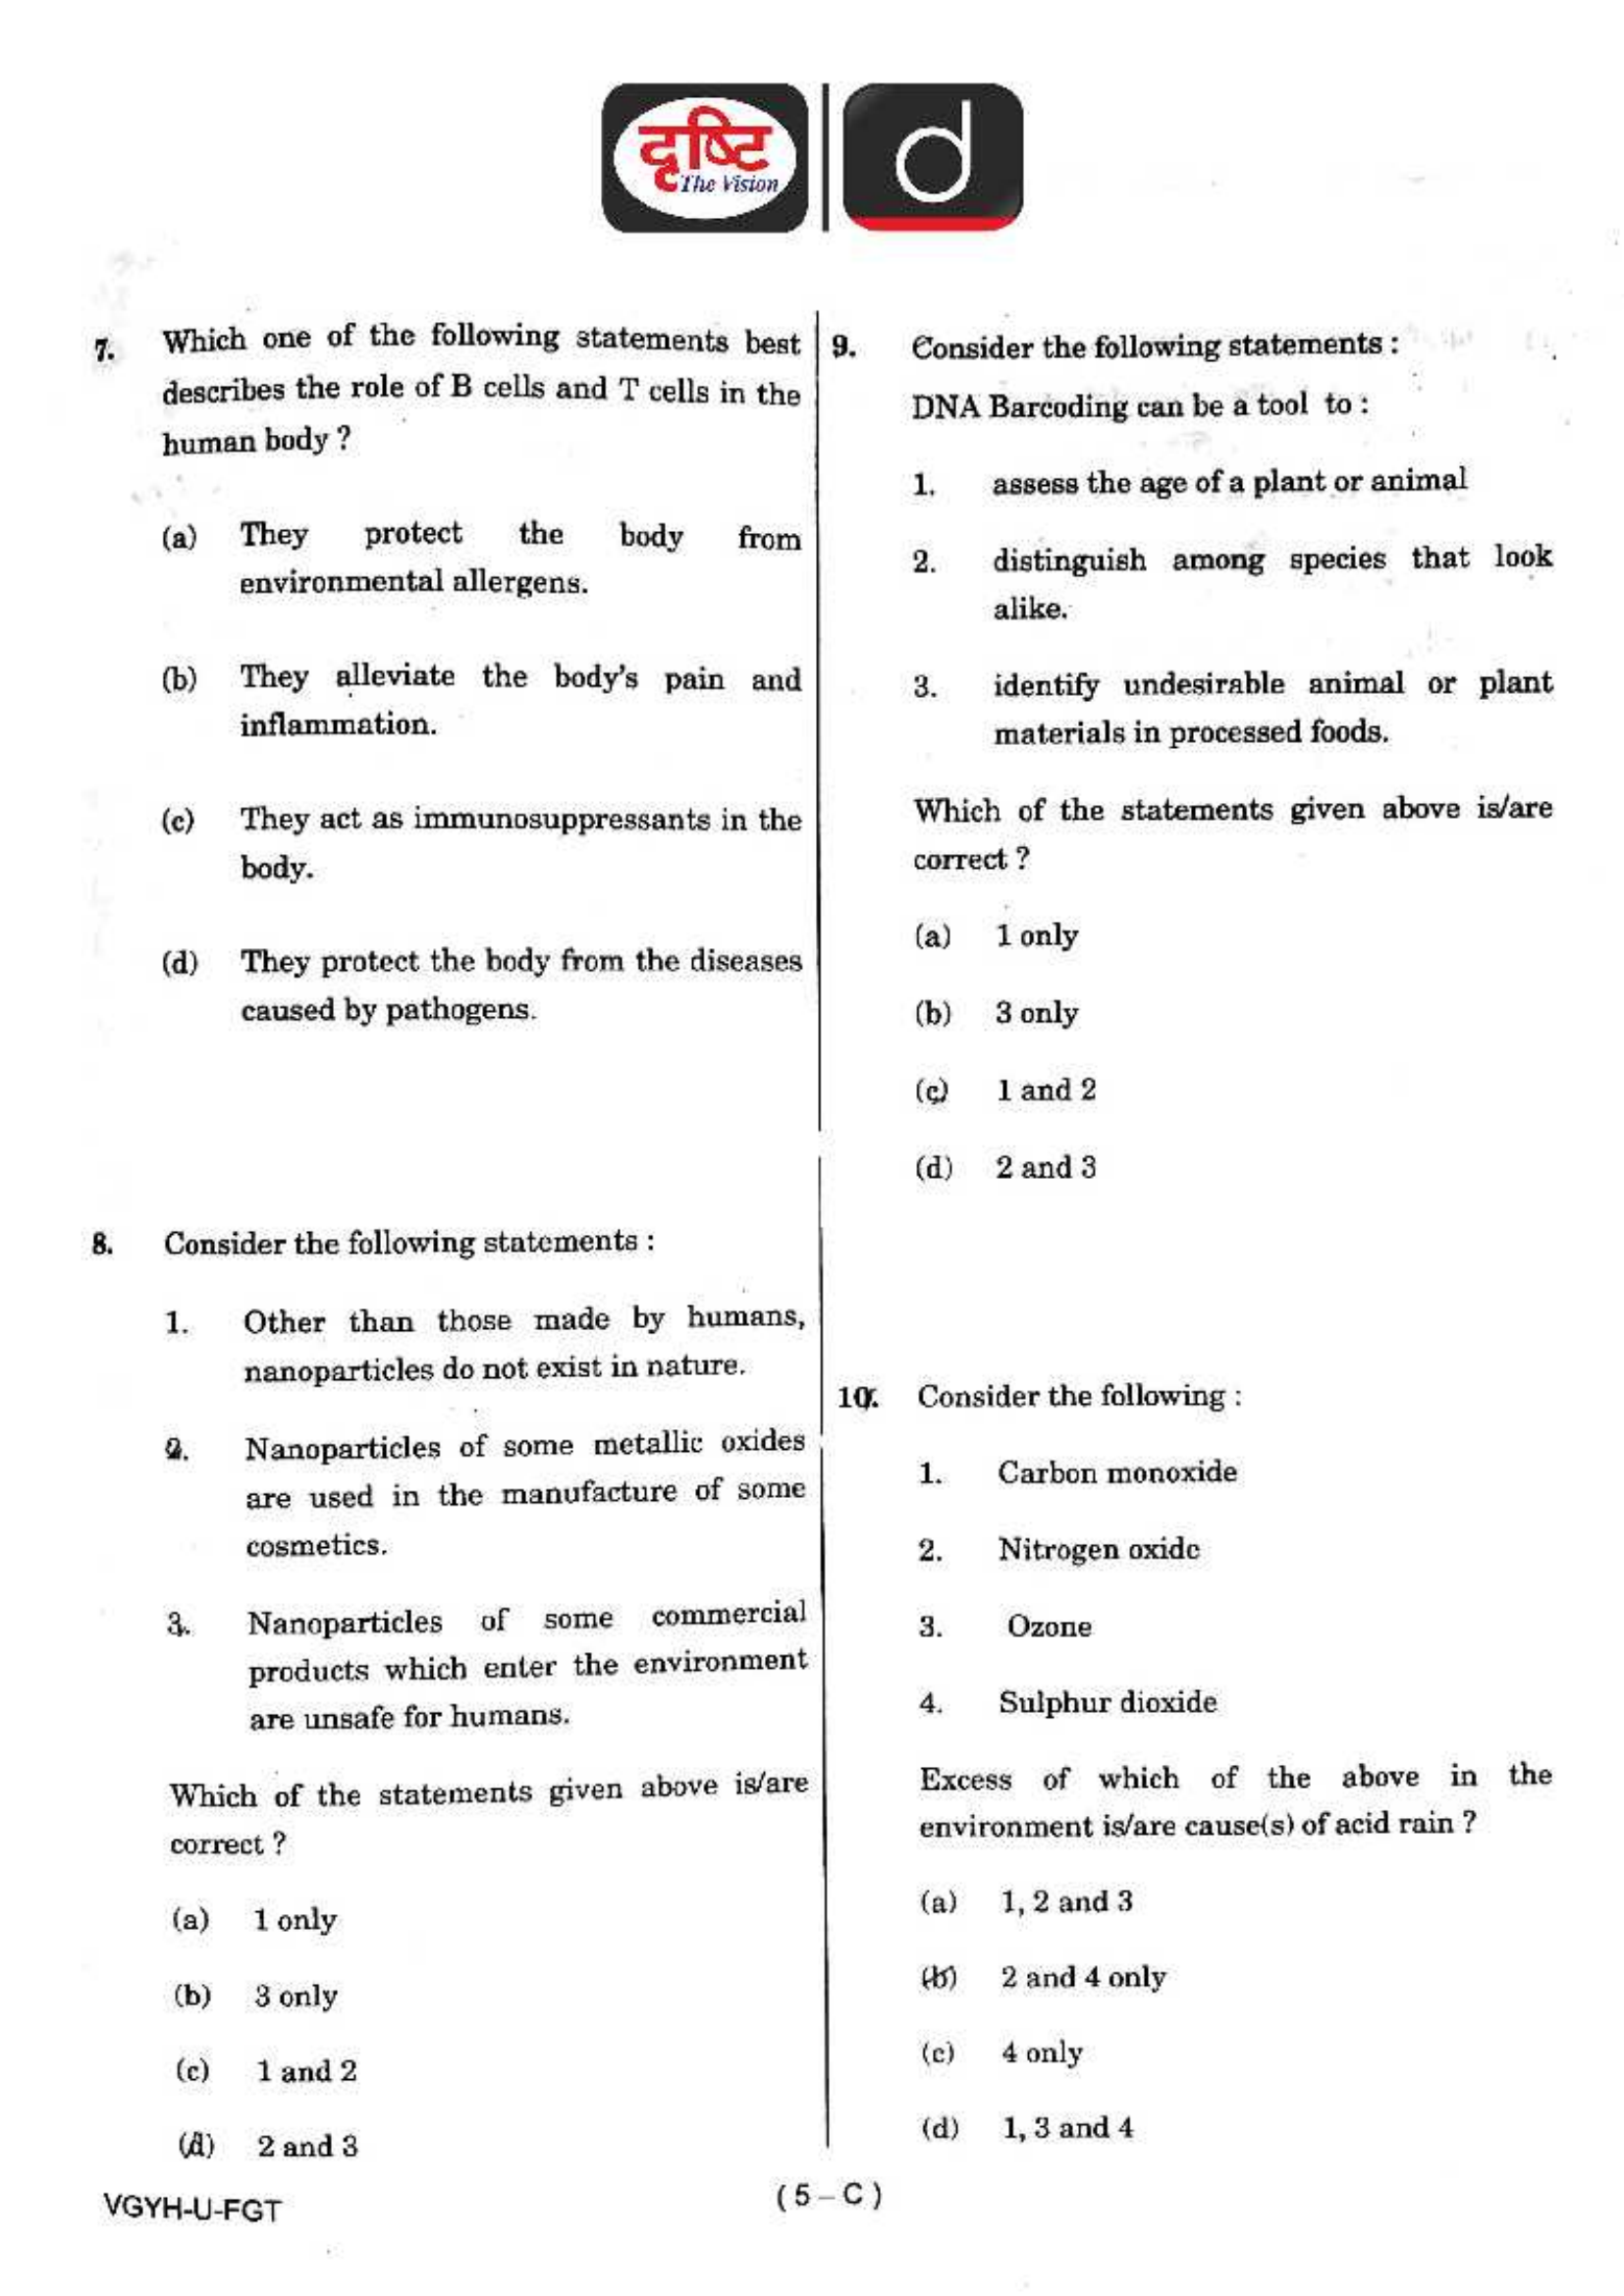

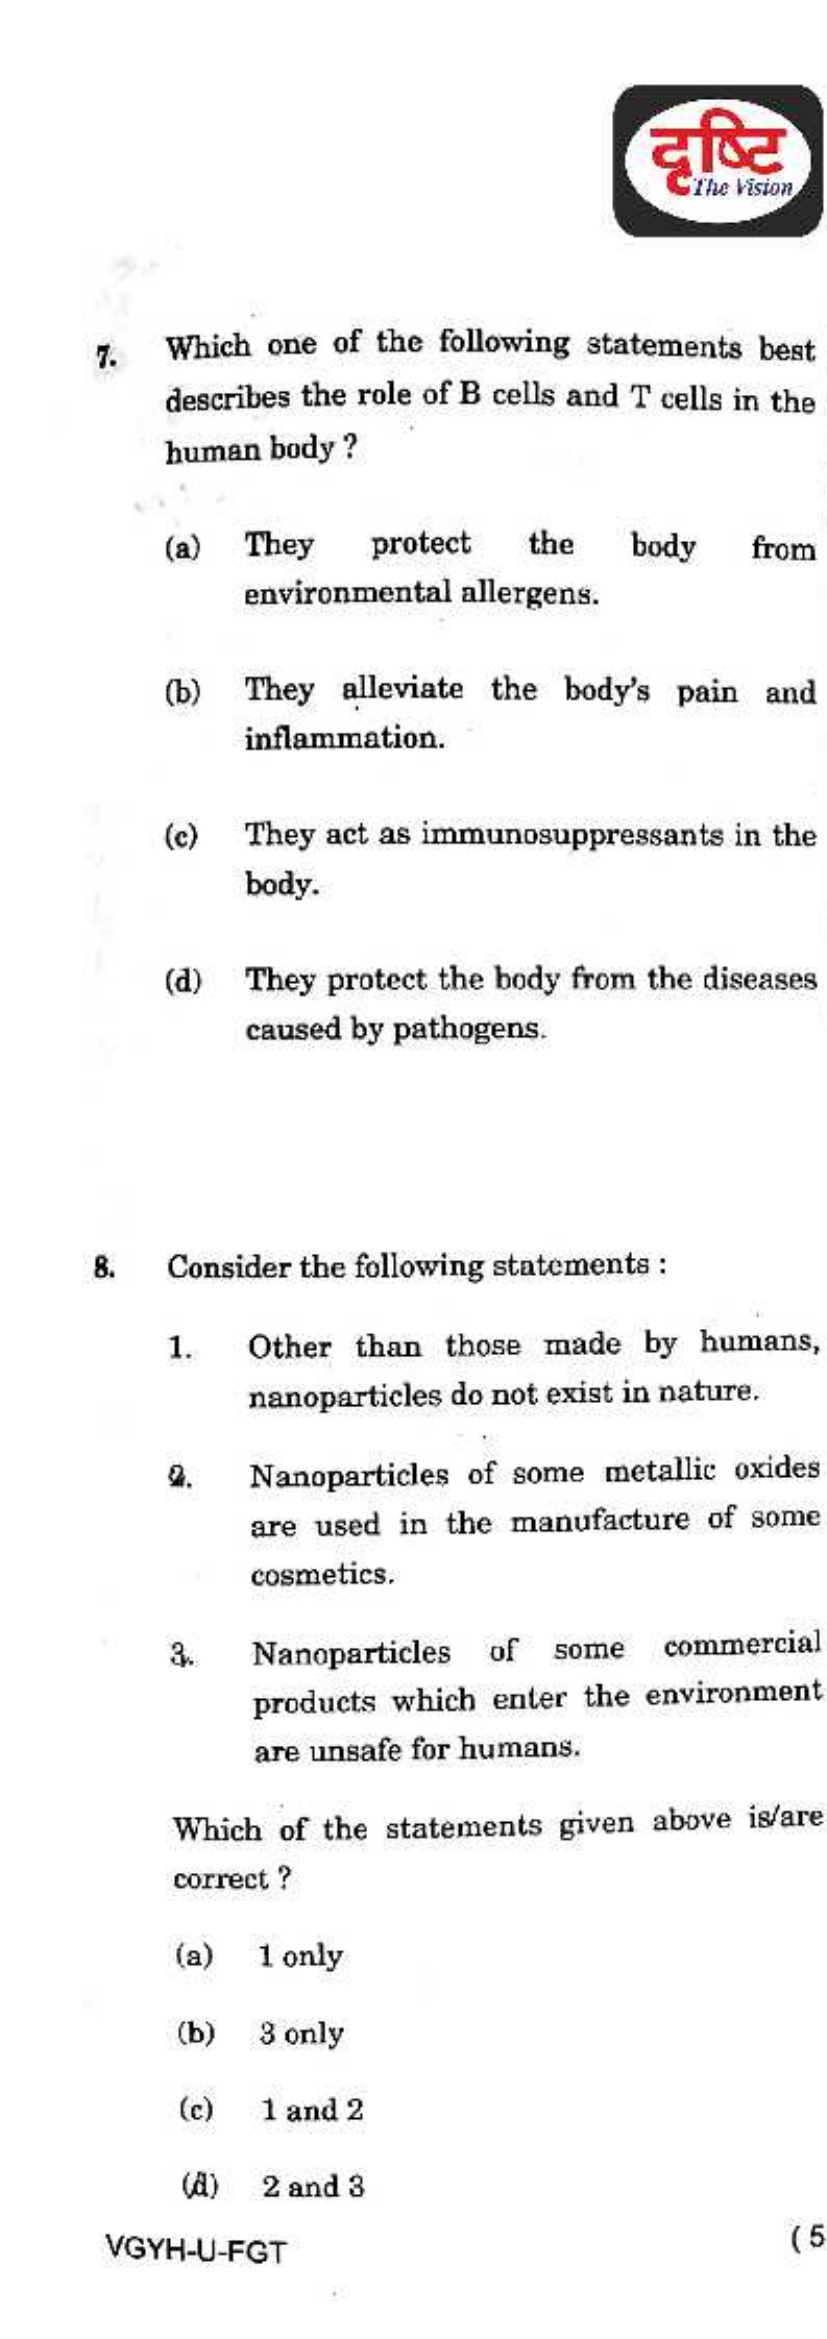

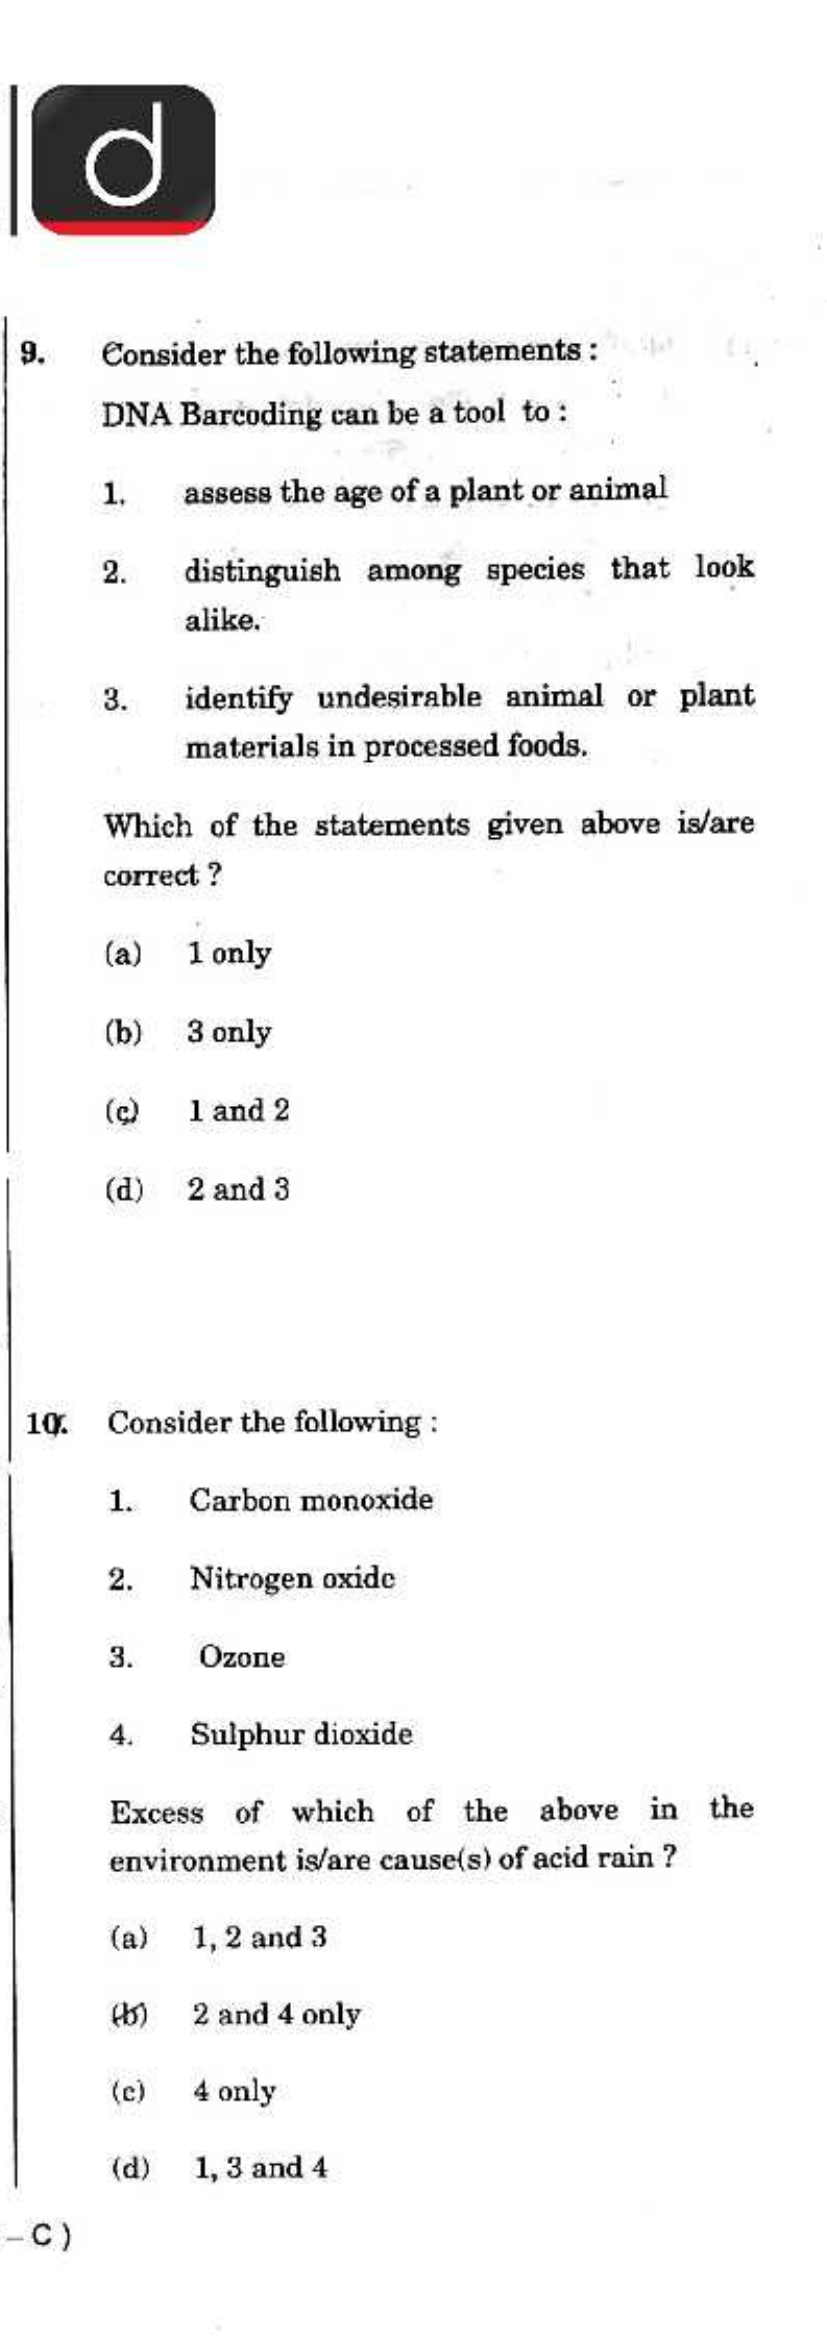

In [ ]:
opencv_image = cv2.cvtColor(np.array(pages[2]), cv2.COLOR_RGB2BGR)
splitImage(opencv_image)

In [ ]:
import pytesseract

def extract_text_from_image(image):
    text = pytesseract.image_to_string(image)
    return text

In [ ]:
extracted_text = []
extracted_text1 = []
final_text_ocr = ""

for index, page in enumerate(pages):
    # Step 2: Preprocess the image (deskew)
    # if index%2==0 and index>0:
    if index>0 and index%2!=0:
      # preprocessed_image = deskew(np.array(page))
      height, width, _ = np.array(page).shape

      # Calculate the center of the image
      center_x, center_y = width // 2, height // 2

      # Divide the image into two parts at the center
      left_half = np.array(page)[:, :center_x, :]
      right_half = np.array(page)[:, center_x:, :]
      # Step 3: Extract text using OCR
      text = extract_text_from_image(left_half)
      extracted_text.append(text)
      text1 = extract_text_from_image(right_half)
      extracted_text1.append(text1)

combined_array = extracted_text + extracted_text1

# Convert the list to a single string
final_text_ocr = '\n'.join(combined_array)

In [ ]:
print(extracted_text)
print(extracted_text1)
print (final_text_ocr)

[' \n\n1, Consider the following pairs :\n\n3.\n4,\n\nSite of. Ashoka’s Location in the\nmajor rock edicts State of\n\nDhauli — Odisha\nErragudi — Andhra Pradesh\nJaugada — Madhya Pradesh\nKalsi — Karnataka\n\nHow many pairs given above are correctly\nmatched ?\n\n(a)\n(b)\n(c)\n(d)\n\nOnly one pair\nOnly two pairs +\nOnly three pairs\nAll four pairs\n\n2, Consider the following pairs :\n\nKing Dynasty\n1. Nannuka — Chandela\n2. Jayashakti — Paramara\n8. NagabhatalII — Gurjara-Pratihara\n4. Bhoja — Rashtrakuta\nHow many pairs given above are correctly\nmatched ?\n(a) Only one pair\n(b) Only two pairs\n(c) Only three pairs\n(% All four pairs\n\n3. Which one of the following statements about\n\nSangam literature in ancient South India is\n\ncorrect ?\n\nfa)\n(b)\n&)\n\n(d)\n\nSangam poems are devoid of any\nreference to material culture.\n\nThe social classification of Varna was\nknown to Sangam poets.\nSangam poems have no refe\nwarrior ethic. :\nSangam literature refers to magical\nfor